In [1]:
# just some imports to be used later
import os
from zipfile import ZipFile

import numpy as np
import seaborn
import pandas as pd
import math

import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA, TruncatedSVD

# The Dataset

In [2]:
# Get dataset
!kaggle datasets download "nelgiriyewithana/mcdonalds-store-reviews"


  0%|          | 0.00/1.78M [00:00<?, ?B/s]
 56%|#####6    | 1.00M/1.78M [00:00<00:00, 3.77MB/s]
100%|##########| 1.78M/1.78M [00:00<00:00, 4.22MB/s]
100%|##########| 1.78M/1.78M [00:00<00:00, 4.14MB/s]


In [3]:
# Extract dataset
with ZipFile('mcdonalds-store-reviews.zip','r') as zipped_file:
    zipped_file.extractall()

# Delete the zipfile
os.remove('mcdonalds-store-reviews.zip')

In [4]:
# Read Dataset
dataset = pd.read_csv('McDonald_s_Reviews.csv',encoding_errors='ignore')

#drop columns
dataset = dataset[['review','rating']].copy()

# change star ratings to integer
dataset['rating'] = dataset['rating'].apply(lambda x: int(x.split()[0]))
dataset.head()

,review,rating
0,Why does it look like someone spit on my food?...,1
1,It'd McDonalds. It is what it is as far as the...,4
2,Made a mobile order got to the speaker and che...,1
3,My mc. Crispy chicken sandwich was �����������...,5
4,"I repeat my order 3 times in the drive thru, a...",1


In [5]:
# drop ratings with no reviews
no_rev = list(dataset.index[dataset['review'].isna()])
dataset = dataset.drop(no_rev)
print(f"Dropped ratings: {len(no_rev)}")

Dropped ratings: 11


# Data Preprocessing

In [6]:
def preprocessing(ipString,tokenizer,stopwords,lemmatizer):
    #preprocessing
    op = ipString.lower()
    op = tokenizer.tokenize(op)
    op = [token for token in op if token not in stopwords]
    op = [lemmatizer.lemmatize(token) for token in op]
    return op

In [7]:
tokenizer = nltk.tokenize.WordPunctTokenizer()
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()

dataset['review'] = dataset['review'].apply(lambda review: preprocessing(review, tokenizer, stopwords, lemmatizer))
dataset.head()

,review,rating
0,"[look, like, someone, spit, food, ?, normal, t...",1
1,"[', mcdonalds, ., far, food, atmosphere, go, ....",4
2,"[made, mobile, order, got, speaker, checked, ....",1
3,"[mc, ., crispy, chicken, sandwich, �����������...",5
4,"[repeat, order, 3, time, drive, thru, ,, still...",1


# Feature Extraction 1

In [8]:
# Should only use training data to generate learning features
train, test = train_test_split(dataset, test_size=0.3, random_state=64)

In [9]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train['review'].apply(lambda tokens: ' '.join(tokens)))
X_test = vectorizer.transform(test['review'].apply(lambda tokens: ' '.join(tokens)))

In [10]:
#PCAnalyzer = PCA(n_components=2)
#PCAnalyzer.fit(X_train)
# PCA doesn't work with sparse matrices, using truncated SVD

decomposer = TruncatedSVD(n_components=2)
X_train = decomposer.fit_transform(X_train)
train['decomposed_C1'] = X_train[:,0]
train['decomposed_C2'] = X_train[:,1]

<AxesSubplot:xlabel='decomposed_C1', ylabel='decomposed_C2'>

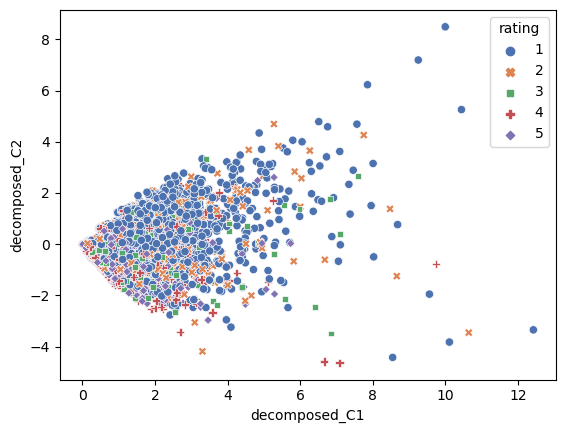

In [11]:
seaborn.scatterplot(train,x='decomposed_C1',y='decomposed_C2',hue='rating',style='rating',palette='deep')

Not a good representation, can't distinguish different ratings visibly thus a bad example of PCA.

# Feature Extraction 2

In [15]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train['review'].apply(lambda tokens: ' '.join(tokens)))

In [17]:
decomposer = TruncatedSVD(n_components=2)
X_train = decomposer.fit_transform(X_train)
train['decomposed_C1'] = X_train[:,0]
train['decomposed_C2'] = X_train[:,1]

<AxesSubplot:xlabel='decomposed_C1', ylabel='decomposed_C2'>

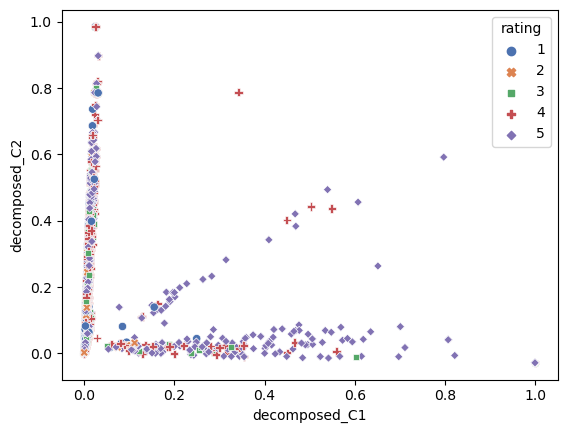

In [18]:
seaborn.scatterplot(train,x='decomposed_C1',y='decomposed_C2',hue='rating',style='rating',palette='deep')

Still not conclusive.